In [1]:
library(SingleCellExperiment)

Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which

In [2]:
bulk <- readRDS("/hps/nobackup/stegle/users/acuomo/singlecell_endodiff/miscellaneous/merged_bulk_salmon_quant.rds")

In [3]:
bulk

class: SingleCellExperiment 
dim: 39385 676 
metadata(0):
assays(2): tpm counts
rownames(39385): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(11): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(676):
  Data/HipSci_ERP007111/quant_salmon/HPSI0114i-bezi_1.hs37d5.
  Data/HipSci_ERP007111/quant_salmon/HPSI0114i-bezi_3.hs37d5. ...
  Data/HipSci_EGAS00001001997/quant_salmon/HPSI0516i-pews_2.hs37d5.
  Data/HipSci_EGAS00001001997/quant_salmon/HPSI0516i-pews_3.hs37d5.
colData names(65): salmon_version samp_type ... pct_counts_MT
  is_cell_control
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [4]:
logcpm_bulk <- edgeR::cpm(counts(bulk), prior.count = 2, log = TRUE)
newcols <- gsub(".*/quant_salmon/*","",colnames(logcpm_bulk))
cols <- gsub("*.hs.*","",newcols)
colnames(logcpm_bulk) <- cols
head(logcpm_bulk)

,HPSI0114i-bezi_1,HPSI0114i-bezi_3,HPSI0114i-eipl_1,HPSI0114i-eipl_3,HPSI0114i-fikt_3,HPSI0114i-iisa_1,HPSI0114i-iisa_3,HPSI0114i-joxm_1,HPSI0114i-kolf_2,HPSI0114i-kolf_3,...,HPSI0516i-eitu_4,HPSI0516i-goek_4,HPSI0516i-hapz_2,HPSI0516i-hapz_3,HPSI0516i-iool_4,HPSI0516i-iool_6,HPSI0516i-oazw_3,HPSI0516i-oazw_4,HPSI0516i-pews_2,HPSI0516i-pews_3
ENSG00000000003_TSPAN6,6.7478423,7.3723219,6.6027879,6.670467,6.5325557,6.2607908,6.2049043,6.4136346,6.3794240,6.0982380,...,4.7023961,6.1149095,6.57452770,6.1132145,6.2374677,6.4816297,6.3242236,6.7140318,6.765941,6.5507389
ENSG00000000005_TNMD,1.2396445,2.6075143,2.7457270,1.796040,1.8062487,1.4958215,1.4846523,1.2493527,1.4316536,1.4975600,...,-0.6699662,1.6624273,0.05885042,1.5629860,1.9526607,0.4264122,2.0207997,0.9451023,3.115977,0.7879407
ENSG00000000419_DPM1,6.4351540,6.5435280,6.4535352,6.488400,6.7655019,6.4641320,6.4412406,6.4584660,6.5721151,6.4799760,...,4.8197038,6.3267307,6.40022473,6.5999318,6.5161226,6.4691210,6.5576157,6.5994284,6.660242,6.5900378
ENSG00000000457_SCYL3,2.3010799,2.9414570,2.6672173,2.182401,2.3778015,2.4083688,2.4962583,2.2587505,1.8163995,2.2621010,...,1.9565996,1.9252852,2.30901525,2.0644377,2.1351029,2.2461685,2.0773365,2.5382794,2.181280,2.0659557
ENSG00000000460_C1orf112,4.1690783,4.4894089,4.1502208,4.383631,4.8552867,4.6337829,4.6588062,4.2474378,4.6036446,4.0224097,...,2.7470801,4.6034535,4.91861630,4.9475882,4.7577833,4.9104630,5.0092311,5.1485615,4.999442,4.7960390
ENSG00000000938_FGR,-0.5687158,-0.4913128,-0.5636239,-1.567461,-0.1777691,-0.6055767,-0.6931276,-0.2360887,-0.6081928,-0.6951849,...,-1.2646136,-0.9360776,-0.50224959,-0.9039374,-0.8155414,-1.1706325,-0.8873781,-0.8635696,-1.576341,-1.4254717


In [5]:
cpm_bulk = counts(bulk)
newcols <- gsub(".*/quant_salmon/*","",colnames(cpm_bulk))
cols <- gsub("*.hs.*","",newcols)
colnames(cpm_bulk) <- cols

In [6]:
ncol(cpm_bulk)

[1] 676

In [7]:
head(colnames(cpm_bulk))
head(gsub(".*-","",colnames(cpm_bulk)))
length(unique(gsub("_[0-9]","",gsub(".*-","",colnames(cpm_bulk)))))

[1] "HPSI0114i-bezi_1" "HPSI0114i-bezi_3" "HPSI0114i-eipl_1" "HPSI0114i-eipl_3"
[5] "HPSI0114i-fikt_3" "HPSI0114i-iisa_1"

[1] "bezi_1" "bezi_3" "eipl_1" "eipl_3" "fikt_3" "iisa_1"

[1] 462

In [8]:
library(ggplot2)
df = data.frame(donor = colnames(cpm_bulk), total_reads = colSums(cpm_bulk))
head(df,2)

,donor,total_reads
HPSI0114i-bezi_1,HPSI0114i-bezi_1,35803089
HPSI0114i-bezi_3,HPSI0114i-bezi_3,37979887


In [9]:
mean(df$total_reads)/1000000

[1] 43.6324

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


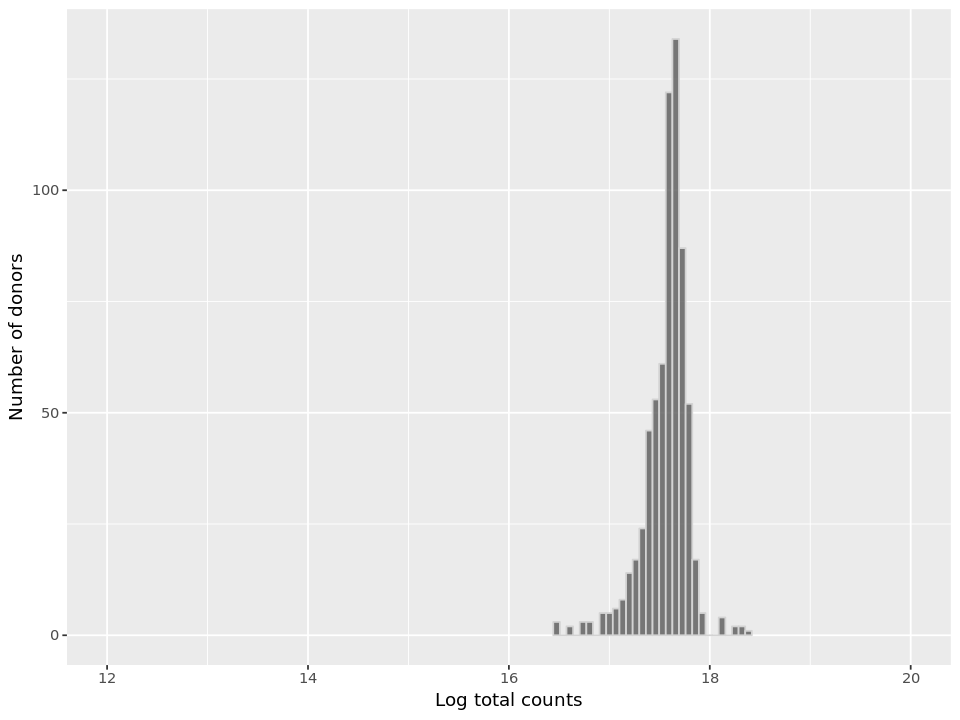

In [17]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(df, aes(x=log(total_reads))) + geom_histogram(alpha = 0.8, col = "lightgrey") + 
    xlab("Log total counts") + ylab("Number of donors") +
    coord_cartesian(xlim = c(12, 20)) 

In [10]:
# load sceset
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [11]:
sce_0 = sce[,sce$day == 'day0']

In [12]:
sc_donors = unique(sce_0$donor_long_id)
head(sc_donors)

[1] "HPSI0114i-zapk_3" "HPSI0214i-wibj_2" "HPSI1013i-jogf_2" "HPSI0214i-pelm_3"
[5] "HPSI0114i-vass_1" "HPSI0214i-heth_1"

In [13]:
head(cpm_bulk)

,HPSI0114i-bezi_1,HPSI0114i-bezi_3,HPSI0114i-eipl_1,HPSI0114i-eipl_3,HPSI0114i-fikt_3,HPSI0114i-iisa_1,HPSI0114i-iisa_3,HPSI0114i-joxm_1,HPSI0114i-kolf_2,HPSI0114i-kolf_3,...,HPSI0516i-eitu_4,HPSI0516i-goek_4,HPSI0516i-hapz_2,HPSI0516i-hapz_3,HPSI0516i-iool_4,HPSI0516i-iool_6,HPSI0516i-oazw_3,HPSI0516i-oazw_4,HPSI0516i-pews_2,HPSI0516i-pews_3
ENSG00000000003_TSPAN6,3846.25631,6291.05638,2971.2791,4157.55524,3403.30075,2363.40241,3610.09865,2699.54533,3121.31608,2655.48022,...,722.38916,3291.50949,5094.40216,3338.3176,3894.84862,4275.32679,4250.63250,5716.46845,5805.35729,4554.68409
ENSG00000000005_TNMD,82.90442,229.72857,203.7413,139.93106,126.94790,85.56223,134.79670,73.86948,99.47332,107.74167,...,16.19598,148.25761,53.25291,140.3685,197.57210,62.13246,212.96536,102.38398,460.21508,81.69777
ENSG00000000419_DPM1,3096.45523,3541.10209,2679.1164,3664.41159,3999.96503,2721.34513,4253.08620,2784.79593,3567.57794,3460.39176,...,783.68978,3812.40385,4514.35767,4678.7147,4725.20244,4238.39937,4997.45313,5279.74614,5395.06231,4680.52020
ENSG00000000457_SCYL3,174.80602,290.01557,192.8760,183.47763,189.47968,162.30679,274.05183,150.17575,130.40085,184.27716,...,106.61300,178.32273,262.55426,199.6303,224.52463,224.89241,221.57405,313.94256,239.59619,201.29632
ENSG00000000460_C1orf112,642.43642,851.36011,541.6634,850.49635,1062.96472,764.21683,1234.74801,600.32251,910.32090,628.52192,...,185.33285,1153.10585,1614.96996,1486.8983,1395.04647,1437.34617,1706.99142,1929.75587,1704.58944,1348.14372
ENSG00000000938_FGR,22.49792,25.27714,19.2920,11.90576,30.83076,18.85456,28.04363,25.44808,22.88955,22.17787,...,10.29471,22.66004,35.30419,23.5775,26.98097,19.06929,26.26117,27.44168,15.44898,15.86835


In [14]:
cpm_bulk_sc = cpm_bulk[,colnames(cpm_bulk) %in% sc_donors]
ncol(cpm_bulk_sc)

[1] 109

In [15]:
colnames(cpm_bulk)[grep("tavh_2",colnames(cpm_bulk))]

[1] "HPSI0514i-tavh_2"

In [16]:
df = data.frame(donor = colnames(cpm_bulk_sc), total_reads = colSums(cpm_bulk_sc))

In [20]:
mean(df$total_reads)/1000000
median(df$total_reads)/1000000

[1] 43.45421

[1] 44.11546

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


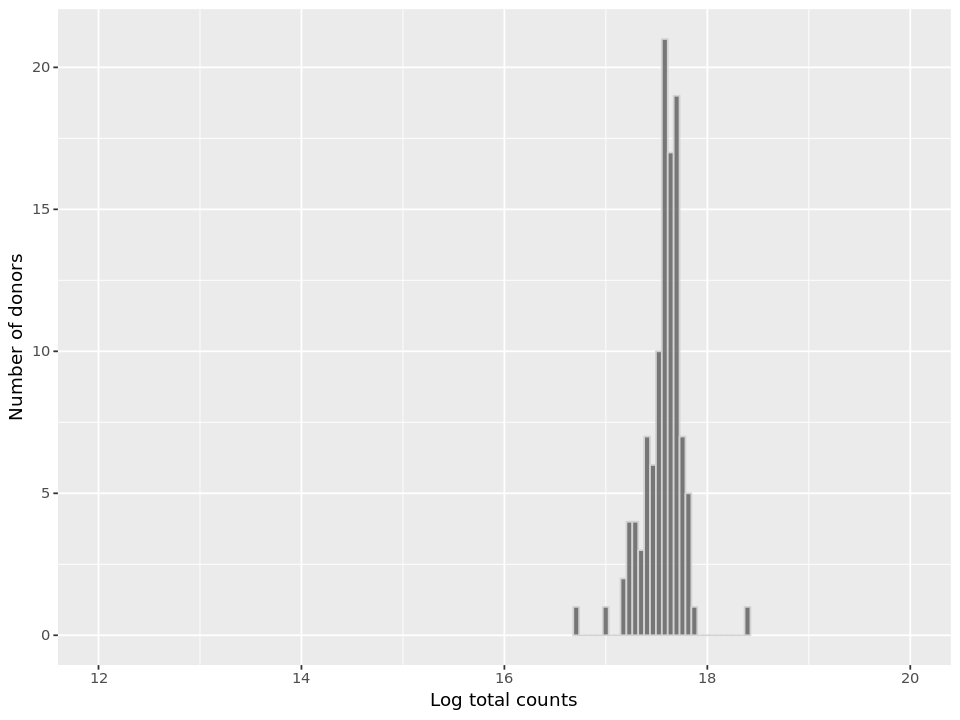

In [27]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(df, aes(x=log(total_reads))) + geom_histogram(alpha = 0.8, col = "lightgrey") + 
    xlab("Log total counts") + ylab("Number of donors") +
    coord_cartesian(xlim = c(12, 20), ylim = c(0,21)) 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


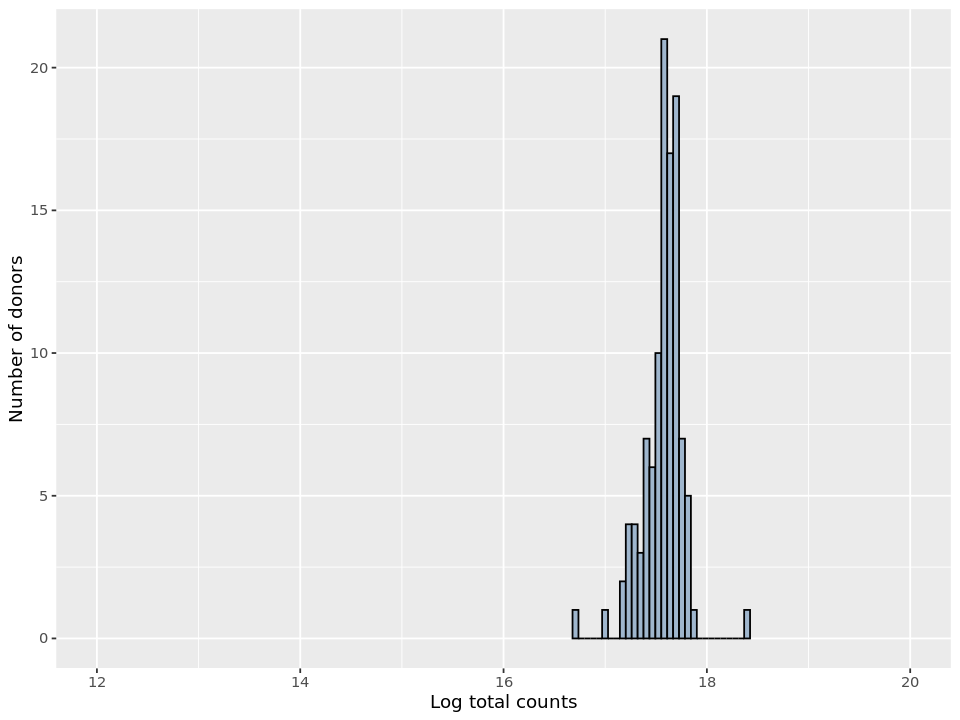

In [19]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(df, aes(x=log(total_reads))) + geom_histogram(alpha = 1, col = "black", fill = "slategray3") + 
    xlab("Log total counts") + ylab("Number of donors") +
    coord_cartesian(xlim = c(12, 20), ylim = c(0,21)) 